In [32]:
def identity_line(ax=None, ls='--', *args, **kwargs):
    ax = ax or plt.gca()
    identity, = ax.plot([], [], ls=ls, *args, **kwargs)
    def callback(axes):
        low_x, high_x = ax.get_xlim()
        low_y, high_y = ax.get_ylim()
        low = min(low_x, low_y)
        high = max(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(ax)
    ax.callbacks.connect('xlim_changed', callback)
    ax.callbacks.connect('ylim_changed', callback)
    return ax

In [6]:
ref = pd.read_csv("../scripts/alphas/Mammals.Homo_sapiens.LMrefRMSK.LM.tsv",sep="\t")
allr = pd.read_csv("../scripts/alphas/Mammals.Homo_sapiens.LM.tsv",sep="\t")

In [7]:
ref = ref[ref.mut_type=="mod"]
allr = allr[allr.mut_type=="mod"]

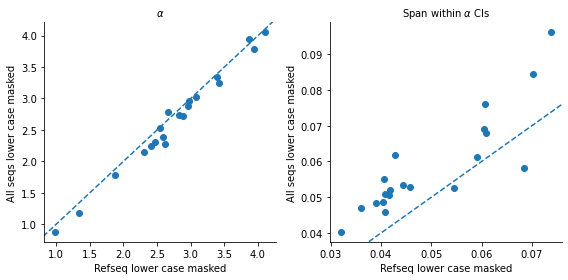

In [34]:
f,axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.scatter(ref.alpha, allr.alpha)
identity_line(ax=ax)
plt.tight_layout()
ax.set_title(r"$\alpha$", fontsize=10)
ax.set_xlabel(r"Refseq lower case masked")
ax.set_ylabel(r"All seqs lower case masked")

ax = axs[1]
ax.scatter(ref.xz_a_upr - ref.xz_a_lwr, allr.xz_a_upr - allr.xz_a_lwr)
identity_line(ax)
ax.set_title(r"Span within $\alpha$ CIs",fontsize=10)
ax.set_xlabel(r"Refseq lower case masked")
ax.set_ylabel(r"All seqs lower case masked")

sns.despine()
plt.tight_layout()
f.savefig("pdfs/Lower-case_masking_comparison.pdf")